# Анализ рынка компьютерных игр 2016 года для онлайн-магазина

# Введение

Требуется провести анализ рынка компьютерных игр за 2016 год для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Краткий план: 
---
- Шаг 1. Открыть файл с данными и изучить общую информацию.
- Шаг 2. Подготовить данные. Найти и исправить ошибки. Преобразовать данные к нужному типу.
- Шаг 3. Провести исследовательский анализ данных.Пояснить наблюдаемые закономерности.  
- Шаг 4. Составить портрет пользователя каждого региона.
- Шаг 5. Проверка гипотез.
- Шаг 6. Сделать общий вывод.

Описание данных:
---
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Ознакомление с данными

#### Подключаем необходимые для предобработки и анализа библиотеки

In [30]:
import pandas as pd # для работы с DataFrame
import numpy as np # для работы с масссивами
import math # для математических операций
from matplotlib import pyplot as plt # для построения диаграмм и графиков
from scipy import stats as st # для использования статистических инструментов

In [31]:
pd.set_option('display.float_format', lambda x:                   # функция, применяемая ко всем датафреймам; отображает 
                                                                  #  0 знаков после запятой, если на конце ".0"
                                                                  #  1 знак, если на конце, например, ".40" 
                                                                  #  2 знака после запятой для всех остальных
                        '%.0f' % x if (x == x and x*10 % 10 == 0) 
                  else ('%.1f' % x if (x == x and x*100 % 10 == 0)
                  else '%.2f' % x))

#### Проводим первичный анализ поступивших данных

In [62]:
df = pd.read_csv('/datasets/games.csv') # изучаем данные
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1,nan,NaN,NaN


После первичного анализа были замечены следующие особенности: во многих столбцах присутствуют пропущенные значения: NaN и nan, некоторые данные требуют преобразования типов. Необходима предобработка данных, так что приступим.

# Предобработка данных

In [63]:
print(df.isnull().sum()) # считаем пропущенные значения
print('Количество полных дубликатов:', df.duplicated().sum()) # считаем дубликаты

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
Количество полных дубликатов: 0


In [64]:
df.columns = df.columns.str.lower() # приведение столбцов к нижнему регистру

In [65]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # суммарные продажи
df.head() # смотрим, что получилось

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1,nan,NaN,NaN,31.38


In [69]:
df.dropna(subset=['name'], inplace=True) # удалаяем пропущенные названия игр
df.dropna(subset=['year_of_release'], inplace=True) # удаляем пропущенный год выпуска
df.dropna(subset=['genre'], inplace=True) # удаляем пропущенный жанр
df['user_score'] = df['user_score'].replace('tbd', np.nan) # замена tbd (то есть человек не определился) на NaN
df['user_score'] = df.groupby('total_sales')['user_score'].transform(lambda x: x.fillna(x.median())) # замена с учетом общих продаж
df['user_score'] = df['user_score'].fillna(df['user_score'].median()) # заполение медианным значенияем
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median()) # заполение медианным значенияем 
print(df.isnull().sum()) # проверка

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
total_sales           0
dtype: int64


In [70]:
df['year_of_release'] = df['year_of_release'].astype('int') # преобразуем в целый тип
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


После предобработки данных были удалены пропущенные значения в столбцах с названием, годом выхода и жанром, поскольку таких значений было очень мало и особого влияния на дальнейший анализ они не окажут. Столбец с рейтингом заполнить не получится, поскольку для этого нужна дополнительная информация. Столбец с оценкой игроков был заполнен, исходя из суммарного дохода медианным значением, потому что нередко на рейтинг игры со стороны игроков влияет (психологически) ее популярность. Столбец с оценкой критиков был просто заполнен медианным значением. Также было проведено преобразование типов для года выхода и оценок игры, поскольку год и оценка критиков обычные целые числа.

# Исследовательский анализ данных

In [94]:
def graph(groupby_column, func, y='name'): # функция для построения диаграмм
    df_to_plot = df.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black')
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, ec='black')

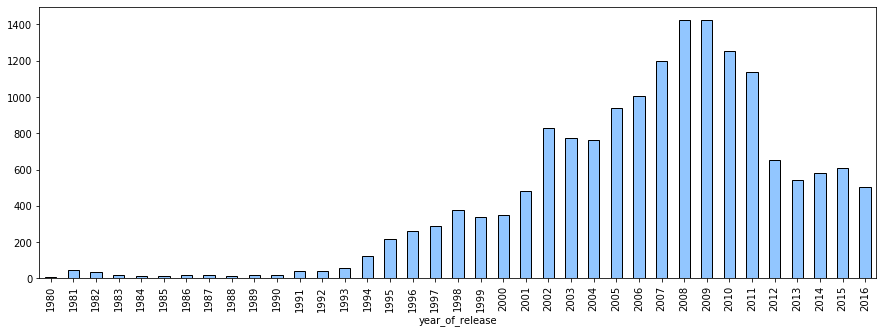

In [95]:
graph('year_of_release', 'count')

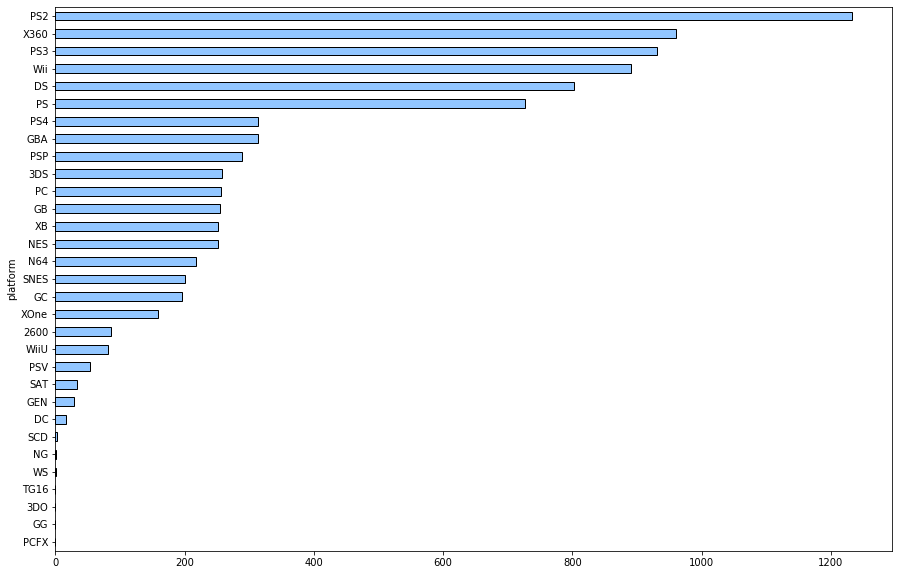

In [96]:
graph('platform', 'sum', 'total_sales')

Из распределений видно, что бурный рост продаж начался в 1995 году, поэтому рассматривать данные будем, начиная с этого периода. И сразу же виден топ-5 платформ по продажам. Это пригодится для дальнейшего анализа.

In [82]:
df_actual = df.query('year_of_release > 1995') # делаем срез для нового датафрейма

Text(0.5, 0, 'Год')

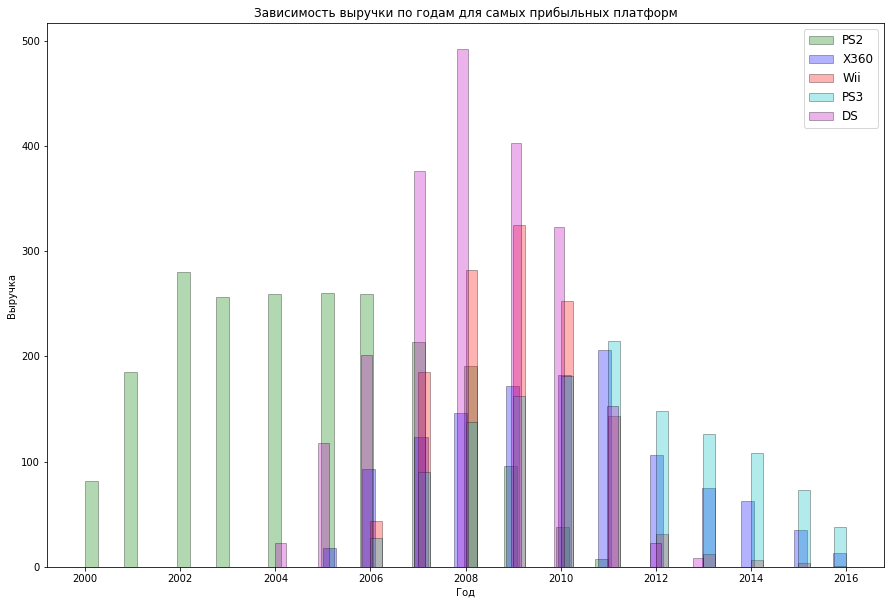

In [83]:
ax = plt.gca() # создаем пустой график
column = 'year_of_release' # данные какого столбца будем рисовать
title = 'Зависимость выручки по годам для самых прибыльных платформ' # заголовок
df_actual[df_actual['platform'] == 'PS2'][column].plot(y='total_sales', kind='hist', bins=40, figsize=(15,10), ax=ax, color='g', 
                                                                    ec='k', title=title,alpha=0.3) # рисуем 1-й график
df_actual[df_actual['platform'] == 'X360'][column].plot(y='total_sales', kind='hist', bins=40, figsize=(15,10), 
                                                                    ax=ax, color='b', 
                                                                    ec='k', title=title, alpha=0.3) # рисуем 2-й график
df_actual[df_actual['platform'] == 'Wii'][column].plot(y='total_sales', kind='hist', bins=40, figsize=(15,10), 
                                                                    ax=ax, color='r', 
                                                                    ec='k', title=title, alpha=0.3) # рисуем 3-й график
df_actual[df_actual['platform'] == 'PS3'][column].plot(y='total_sales', kind='hist', bins=40, figsize=(15,10), 
                                                                    ax=ax, color='c', 
                                                                    ec='k', title=title, alpha=0.3) # рисуем 4-й график
df_actual[df_actual['platform'] == 'DS'][column].plot(y='total_sales', kind='hist', bins=40, figsize=(15,10), 
                                                                    ax=ax, color='m', 
                                                                    ec='k', title=title, alpha=0.3) # рисуем 5-й график
plt.legend(['PS2', 'X360', 'Wii', 'PS3', 'DS'], prop={'size':12}) # рисуем легенду (содержание и размер шрифта)
ax.set_ylabel('Выручка')
ax.set_xlabel('Год')

Из данного распределения видно, что средний жизненный цикл платформа составляет примерно 9-10 лет. К 2016 году продажи всех прибыльных платформ падают, что говорит о том, что скоро выйдет новая платформа и пользователи в ожидании.

Text(0.5, 0, 'Год')

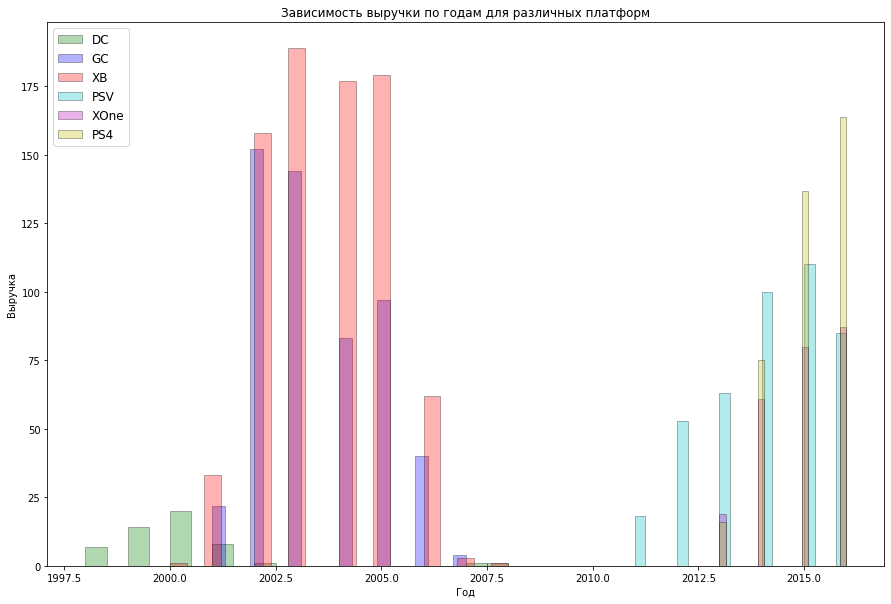

In [98]:
ax = plt.gca() # создаем пустой график
column = 'year_of_release' # данные какого столбца будем рисовать
title = 'Зависимость выручки по годам для различных платформ' # заголовок
df_actual[df_actual['platform'] == 'DC'][column].plot(y='total_sales', kind='hist', bins=20, figsize=(15,10), ax=ax, color='g', 
                                                                    ec='k', title=title,alpha=0.3) # рисуем 1-й график
df_actual[df_actual['platform'] == 'GC'][column].plot(y='total_sales', kind='hist', bins=20, figsize=(15,10), 
                                                                    ax=ax, color='b', 
                                                                    ec='k', title=title, alpha=0.3) # рисуем 2-й график
df_actual[df_actual['platform'] == 'XB'][column].plot(y='total_sales', kind='hist', bins=20, figsize=(15,10), 
                                                                    ax=ax, color='r', 
                                                                    ec='k', title=title, alpha=0.3) # рисуем 3-й график
df_actual[df_actual['platform'] == 'PSV'][column].plot(y='total_sales', kind='hist', bins=20, figsize=(15,10), 
                                                                    ax=ax, color='c', 
                                                                    ec='k', title=title, alpha=0.3) # рисуем 4-й график
df_actual[df_actual['platform'] == 'XOne'][column].plot(y='total_sales', kind='hist', bins=20, figsize=(15,10), 
                                                                    ax=ax, color='m', 
                                                                    ec='k', title=title, alpha=0.3) # рисуем 5-й график
df_actual[df_actual['platform'] == 'PS4'][column].plot(y='total_sales', kind='hist', bins=20, figsize=(15,10), 
                                                                    ax=ax, color='y', 
                                                                    ec='k', title=title, alpha=0.3) # рисуем 6-й график
plt.legend(['DC', 'GC', 'XB', 'PSV', 'XOne', 'PS4'], prop={'size':12}) # рисуем легенду (содержание и размер шрифта)
ax.set_ylabel('Выручка')
ax.set_xlabel('Год')

Из данного распределения видно, что платформы XBox One, PSV и PS4 набирают популярность. Будем делать ставку на них!

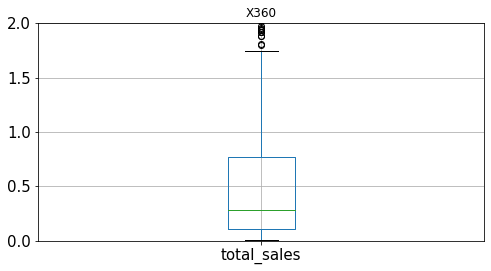

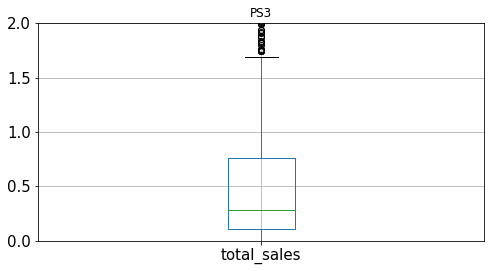

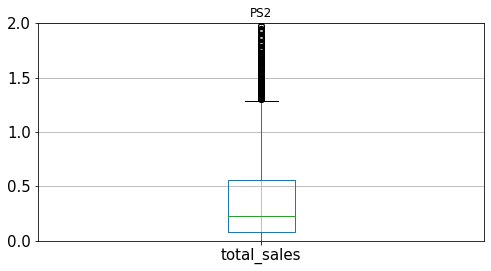

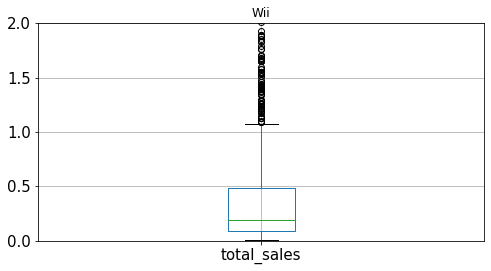

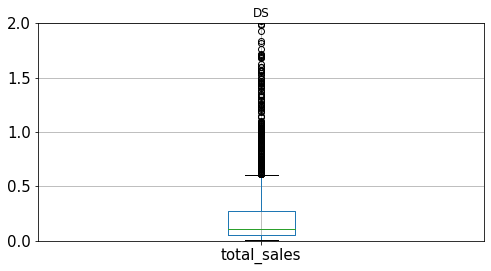

In [13]:
list1 = ['X360','PS3', 'PS2', 'Wii', 'DS'] # создаем список самых прибыльных платформ
for i in list1:
    df_1 = df_actual.query('platform == @i') # строим в цикле диаграммы размаха
    s = df_1.boxplot(column='total_sales', fontsize=15, figsize=(8,4))
    s.set_ylim(0,2)
    s.set_title(i)
    plt.show()

Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов.
У остальных - от 1 до 1,5 миллионов долларов.

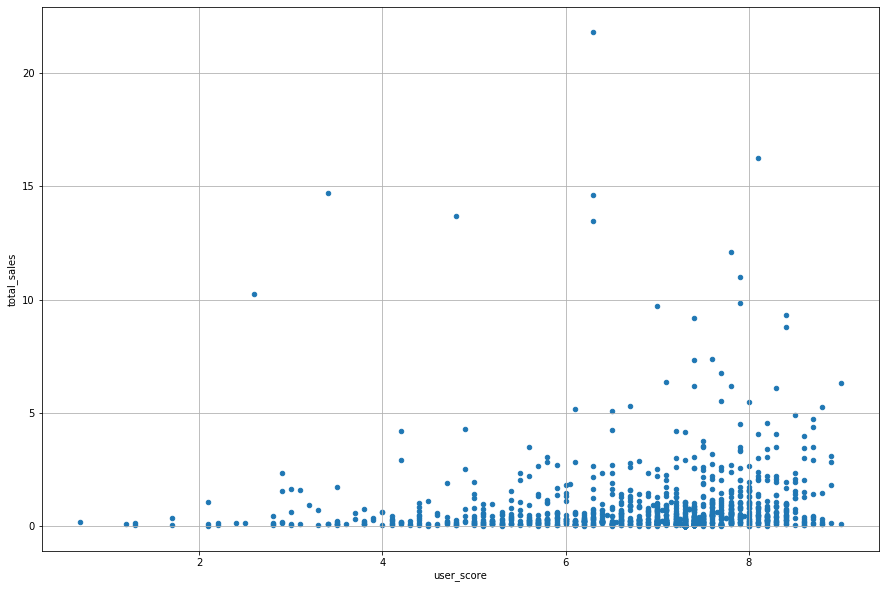

In [15]:
df_x360 = df_actual.query('platform == "X360"') # делаем срез для одной платформы
df_x360.plot(y='total_sales', x='user_score',  kind='scatter', grid=True, figsize=(15, 10)) # строим диаграмму рассеяния

Видно, что с увеличением рейтинга увеличиваются продажи, однако на диаграмме много выбросов, что говорит о том, что тренд не явно выражен.

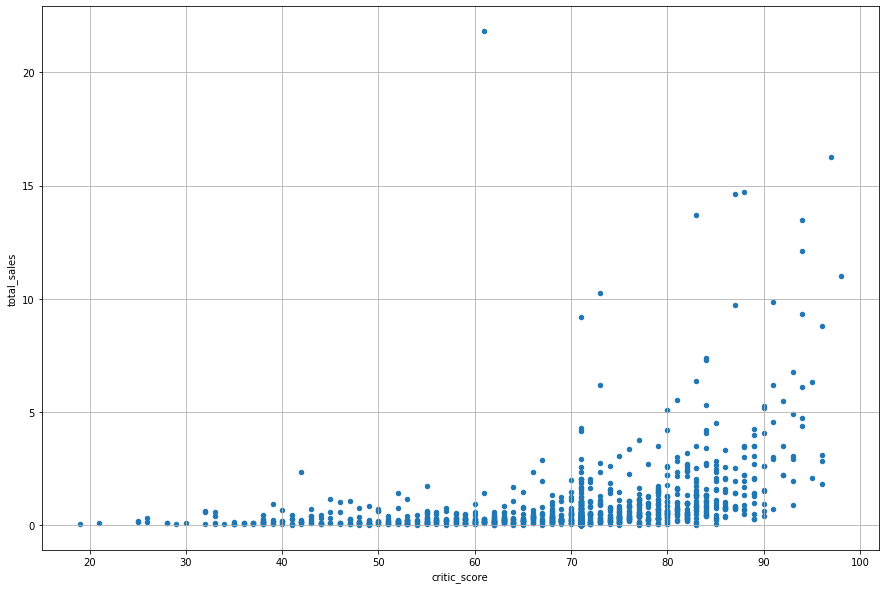

In [16]:
df_x360.plot(y='total_sales', x='critic_score',  kind='scatter', grid=True, figsize=(15, 10)) # строим диаграмму рассеяния

С увеличением рейтинга критиков увеличивается и уровень выручки с продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику.

In [16]:
print(df_x360['total_sales'].corr(df_x360['critic_score'])) # считаем коэффиценты Пирсона
print(df_x360['total_sales'].corr(df_x360['user_score']))

0.3606494835478315
0.07361569445587367


Из более подробного анализа платформы Xbox360 видно, что прибыль от продаж игр не сильно зависит от отзывов критиков и пользователей, однако влияние критиков гораздо больше. Лучше всего продаются игры с рейтингом от критиков в районе 70 и от пользователей в районе 8.

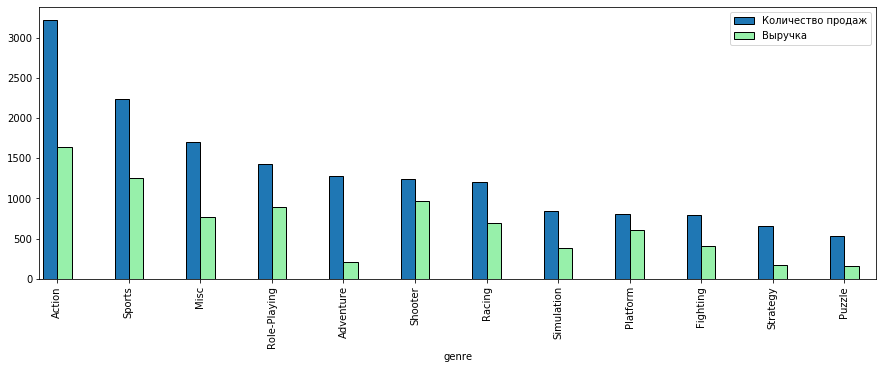

In [17]:
ax = plt.gca()
pivot = df_actual.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)
plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)
plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)
ax.legend(['Количество продаж', 'Выручка'])

Больше всего игр жанра Action. За ними идут игры спортивного жанра. Игр жанра Sports заметно меньше на рынке, но выручка от продаж у них практически одинаковая. Это значит, что спортивные игры, в среднем, стоят дороже, чем экшн.

# Портрет пользователя каждого региона

In [25]:
def top_in_regions(groupby, region_sales, ax): # функция для отрисовки портрета пользователя по регионам
    pivot = df_actual.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America sales', 'eu_sales': 'Europe sales', 'jp_sales': 'Japan sales'}
    color_dict = {'na_sales': 'green', 'eu_sales': 'red', 'jp_sales': 'blue'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

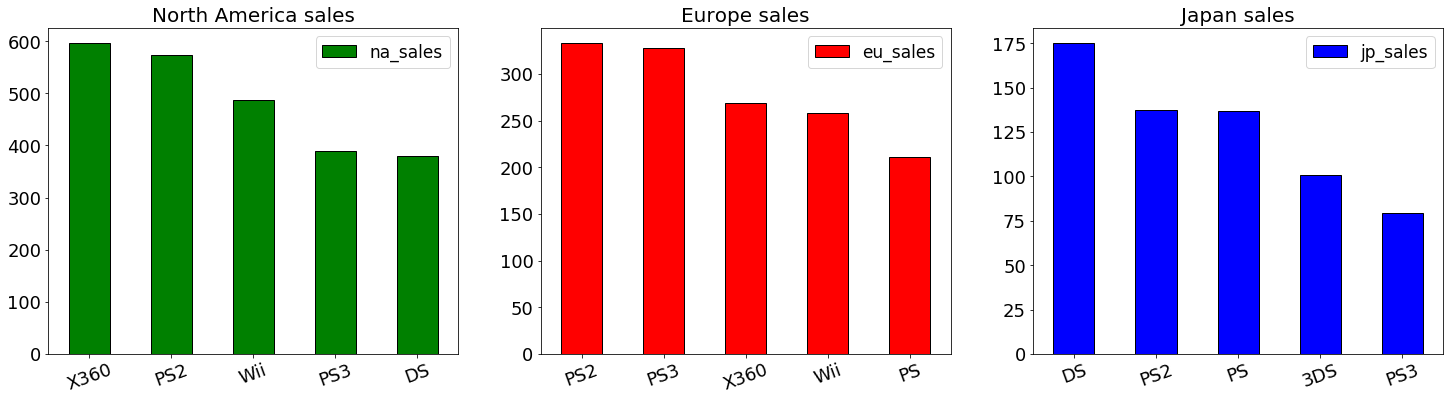

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(25,6)) # топ-5 платформ

top_in_regions('platform', 'na_sales', 0)
top_in_regions('platform', 'eu_sales', 1)
top_in_regions('platform', 'jp_sales', 2)

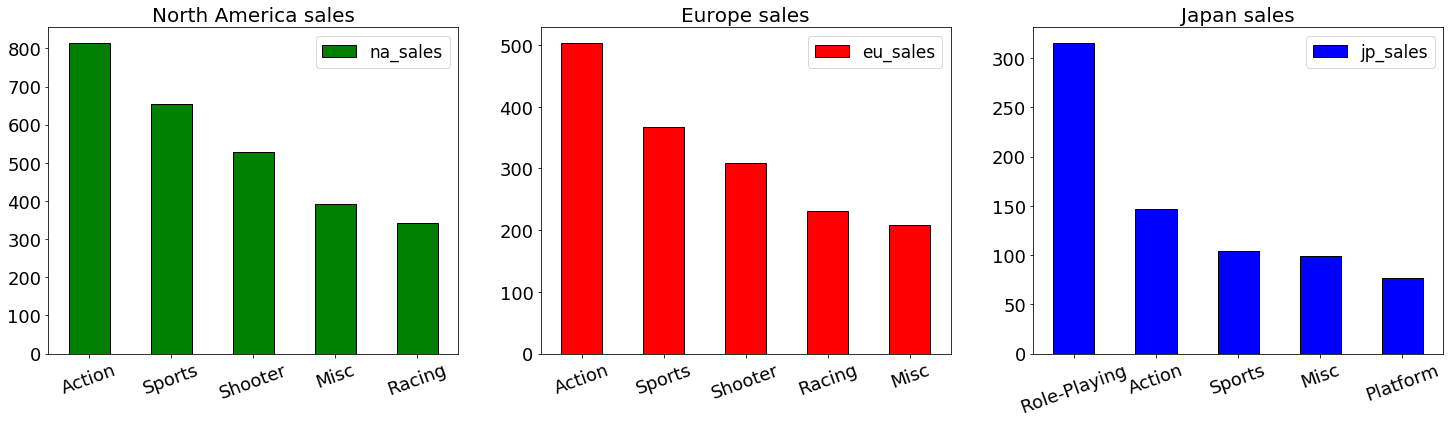

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(25,6)) # топ-5 жанров

top_in_regions('genre', 'na_sales', 0)
top_in_regions('genre', 'eu_sales', 1)
top_in_regions('genre', 'jp_sales', 2)

In [20]:
ESRB_rating = {'E': '6+', 'M': '17+', 'T': '12+', 'E10+': '10+', 'K-A': '6+(устар.)'}

In [21]:
df_actual['ESRB_description'] = df_actual[df_actual['rating'].notnull()]['rating'].map(ESRB_rating)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


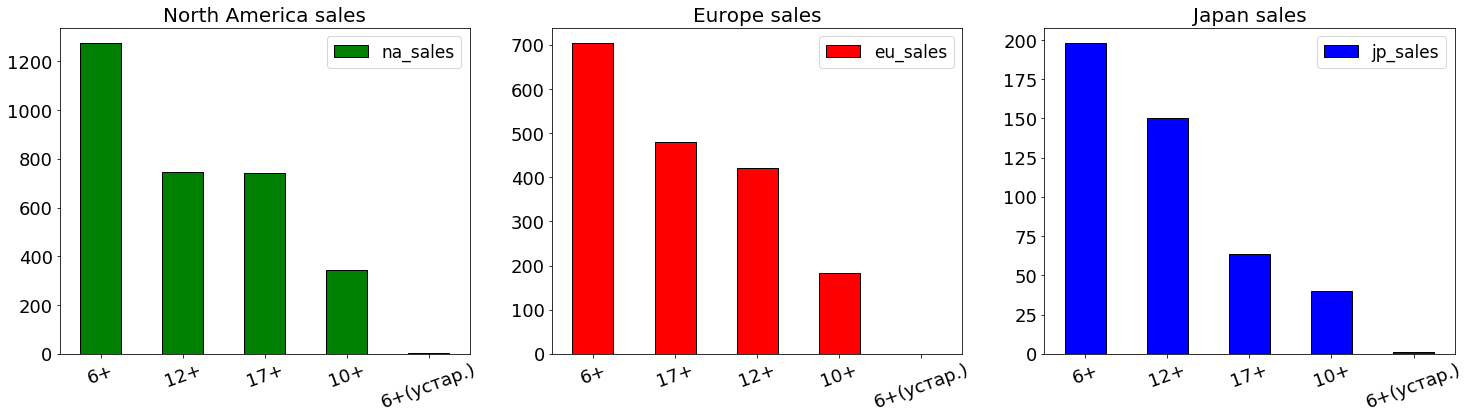

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(25,6)) # топ-5 возрастного рейтинга

top_in_regions('ESRB_description', 'na_sales', 0)
top_in_regions('ESRB_description', 'eu_sales', 1)
top_in_regions('ESRB_description', 'jp_sales', 2)

После проведенного анализа по регионам можно сделать следующие выводы: в Северной Америке чаще всего используют Xbox360 и играют в экшн-игры категории E(6+); в Европе чащей всего используют PS2 и PS3 и так же играют в экшн-игры категории E(6+), а вот в Японии самая популярная платформа DS и играют на ней в ролевые игры категории K-A. 

# Проверка гипотез

In [27]:
def mean_confidence_interval(data, confidence=0.95): # функция для расчета доверительного интервала
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m, m+h

In [28]:
mean_confidence_interval(df[df['platform'] == 'XOne']['user_score']) # строим доверительный интервал

(6.575968108176865, 6.731376518218623, 6.88678492826038)

In [29]:
mean_confidence_interval(df[df['platform'] == 'PC']['user_score']) # строим доверительный интервал

(7.0408259921921434, 7.128004179728317, 7.215182367264491)

In [30]:
alpha = .05 # критический уровень статистической значимости    
results = st.ttest_ind(                        # проверка гипотезы о равенстве средних 
    df[df['platform'] == 'XOne']['user_score'], 
    df[df['platform'] == 'PC']['user_score'], equal_var = False)   
print('p-значение: ', results.pvalue)  
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.501675453338829e-05
Отвергаем нулевую гипотезу


In [31]:
mean_confidence_interval(df[df['genre'] == 'Sports']['user_score']) # строим доверительный интервал

(7.128719789154576, 7.1758456201214225, 7.222971451088269)

In [32]:
mean_confidence_interval(df[df['genre'] == 'Action']['user_score']) # строим доверительный интервал

(7.160765306862756, 7.197580889023283, 7.23439647118381)

In [33]:
alpha = .05 # критический уровень статистической значимости    
results = st.ttest_ind(                        # проверка гипотезы о равенстве средних 
    df[df['genre'] == 'Sports']['user_score'], 
    df[df['genre'] == 'Action']['user_score'], equal_var = False)   
print('p-значение: ', results.pvalue)   
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4760710386484339
Не получилось отвергнуть нулевую гипотезу


Итак, первая нулевая гипотеза: средний пользовательский рейтинг платоформ «Xbox One» и «PC» одинаков. Альтернативаня гипотеза: нет, рейтинги различаются. Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind. После проведения теста нулевая гипотеза не подтвердилась. Вторая нулевая гипотеза: средний пользовательский рейтинг жанров «Sports» и «Action» одинаков. Альтернативаня гипотеза: нет, не одинаков. После проведения теста нулевая гипотеза подтвердилась. А значит, изначальное предположение, что они различаются, является неверным.

# Общий вывод

После проведенного анализа по регионам можно сделать следующие выводы: в Северной Америке чаще всего используют Xbox360 и играют в экшн-игры категории E(6+); в Европе чащей всего используют PS2 и PS3 и так же играют в экшн-игры категории E(6+), а вот в Японии самая популярная платформа DS и играют на ней в ролевые игры категории K-A. 
---
Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам, был применен метод scipy.stats.ttest_ind. После проведения теста гипотеза "Средний пользовательский рейтинг платоформ «Xbox One» и «PC» одинаков" не подтвердилась, так же как и гипотеза "Средний пользовательский рейтинг жанров «Sports» и «Action» различается".
---
Таким образом, интернет-магазину стоит сконцентрироваться на играх жанра экшн, с возрастным рейтингом для всех и под платформы XBox One и PS4, так как они набирают популярность. Такие игры должны принести в 2017 году наибольшую прибыль.
---